In [2]:
#initial size of the data
import pandas as pd

PATH = "/content/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(PATH)
print(df.shape)

(32065, 26)


# Initial Data Analysis

## FInding Missing Values

In [3]:
miss = df.isna().sum()
miss_pct = (df.isna().mean() * 100).round(2)
missing_tbl = pd.concat([miss.rename("count"), miss_pct.rename("percent_%")], axis=1)
print("Missing values (count and proportion):")
print(missing_tbl[missing_tbl["count"] > 0].sort_values("percent_%", ascending=False), "\n")


Missing values (count and proportion):
Empty DataFrame
Columns: [count, percent_%]
Index: [] 



No Missing Values Identified

In [4]:
# Unique values in categorical (object/category/bool)
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns
print("Unique values in categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print("Examples:", df[col].unique()[:10])  # up to 10 examples
    print()


Unique values in categorical features:
timestamp: 32065 unique values
Examples: ['2021-01-01 00:00:00' '2021-01-01 01:00:00' '2021-01-01 02:00:00'
 '2021-01-01 03:00:00' '2021-01-01 04:00:00' '2021-01-01 05:00:00'
 '2021-01-01 06:00:00' '2021-01-01 07:00:00' '2021-01-01 08:00:00'
 '2021-01-01 09:00:00']

risk_classification: 3 unique values
Examples: ['Moderate Risk' 'High Risk' 'Low Risk']



In [5]:
#Unique values in numerical (all numeric types)
numeric_cols = df.select_dtypes(include="number").columns
print("Unique values in numerical features:")
for col in numeric_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print("Examples:", df[col].unique()[:10])  # up to 10 examples
    print()

Unique values in numerical features:
vehicle_gps_latitude: 32065 unique values
Examples: [40.37556848 33.50781834 30.02063979 36.64922251 30.00127928 47.86454911
 33.84639038 32.60188466 39.78719415 47.72849911]

vehicle_gps_longitude: 32065 unique values
Examples: [ -77.01431774 -117.03690241  -75.26922404  -70.1905293   -70.01219476
 -119.99838573  -95.94011786 -102.31663498  -90.89791849 -113.41356063]

fuel_consumption_rate: 32037 unique values
Examples: [5.13651186 5.10151153 5.09080262 8.2195575  5.00007488 5.53356273
 5.77980365 5.47469457 5.68060734 5.0884254 ]

eta_variation_hours: 32065 unique values
Examples: [4.99800922 0.98492942 4.9726651  3.09506354 3.21607673 4.86238648
 4.99997906 0.37551117 4.95887507 1.5087091 ]

traffic_congestion_level: 32065 unique values
Examples: [5.9275858  1.59199219 8.78776535 0.04525715 8.0048509  0.49940495
 8.75050112 4.81307828 9.61316081 9.89740737]

warehouse_inventory_level: 32065 unique values
Examples: [9.85716862e+02 3.96700206e+02 

In [6]:
# Get min and max values, formatted as decimals
num_summary = df.describe().T[['min', 'max']].applymap(lambda x: f"{x:.6f}")
num_summary

/tmp/ipython-input-3448295976.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_summary = df.describe().T[['min', 'max']].applymap(lambda x: f"{x:.6f}")


,min,max
vehicle_gps_latitude,30.000000,50.000000
vehicle_gps_longitude,-119.999998,-70.000000
fuel_consumption_rate,5.000000,19.999875
eta_variation_hours,-1.999993,5.000000
traffic_congestion_level,0.000000,9.999999
warehouse_inventory_level,0.000000,999.999298
loading_unloading_time,0.500000,5.000000
handling_equipment_availability,0.000000,0.999999
order_fulfillment_status,0.000001,1.000000
weather_condition_severity,0.000000,1.000000


# Prepping Dataset

Converting Dates from the Dataset to Hour,Day,Month,Peak Hour

In [7]:


# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Derive time features
df['month'] = df['timestamp'].dt.month       # 1–12
df['hour'] = df['timestamp'].dt.hour         # 0–23

# Map days of the week (Sunday = 1, Saturday = 7)
day_map = {
    "Sunday": 1,
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7
}
df['day_of_week'] = df['timestamp'].dt.day_name().map(day_map)

# Define peak vs off-peak hours (binary encoding)
def label_peak(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 1  # peak
    else:
        return 0  # off-peak

df['peak_hour'] = df['hour'].apply(label_peak)

print(df[['timestamp', 'day_of_week', 'month', 'hour', 'peak_hour']].head())


            timestamp  day_of_week  month  hour  peak_hour
0 2021-01-01 00:00:00            6      1     0          0
1 2021-01-01 01:00:00            6      1     1          0
2 2021-01-01 02:00:00            6      1     2          0
3 2021-01-01 03:00:00            6      1     3          0
4 2021-01-01 04:00:00            6      1     4          0


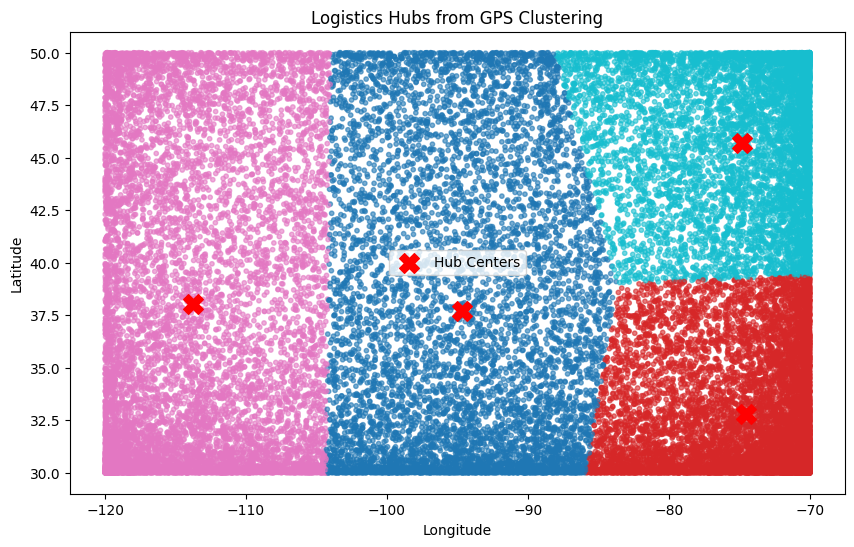

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract GPS coordinates
coords = df[['vehicle_gps_latitude', 'vehicle_gps_longitude']]

# Choose number of hubs
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['hub_cluster'] = kmeans.fit_predict(coords)

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(df['vehicle_gps_longitude'], df['vehicle_gps_latitude'],
            c=df['hub_cluster'], cmap='tab10', s=10, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
            c='red', marker='X', s=200, label='Hub Centers')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Logistics Hubs from GPS Clustering")
plt.legend()
plt.show()


In [9]:
df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation,month,hour,day_of_week,peak_hour,hub_cluster
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.978599,0.506152,0.885291,Moderate Risk,9.110682,1,0,6,0,3
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,0.918586,0.980784,0.544178,High Risk,8.175281,1,1,6,0,2
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,0.394215,0.998633,0.803322,High Risk,1.283594,1,2,6,0,1
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,0.905444,0.993320,0.025977,High Risk,9.304897,1,3,6,0,1
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,0.258702,0.912433,0.991122,High Risk,7.752484,1,4,6,0,1


##Analysing Data Spread

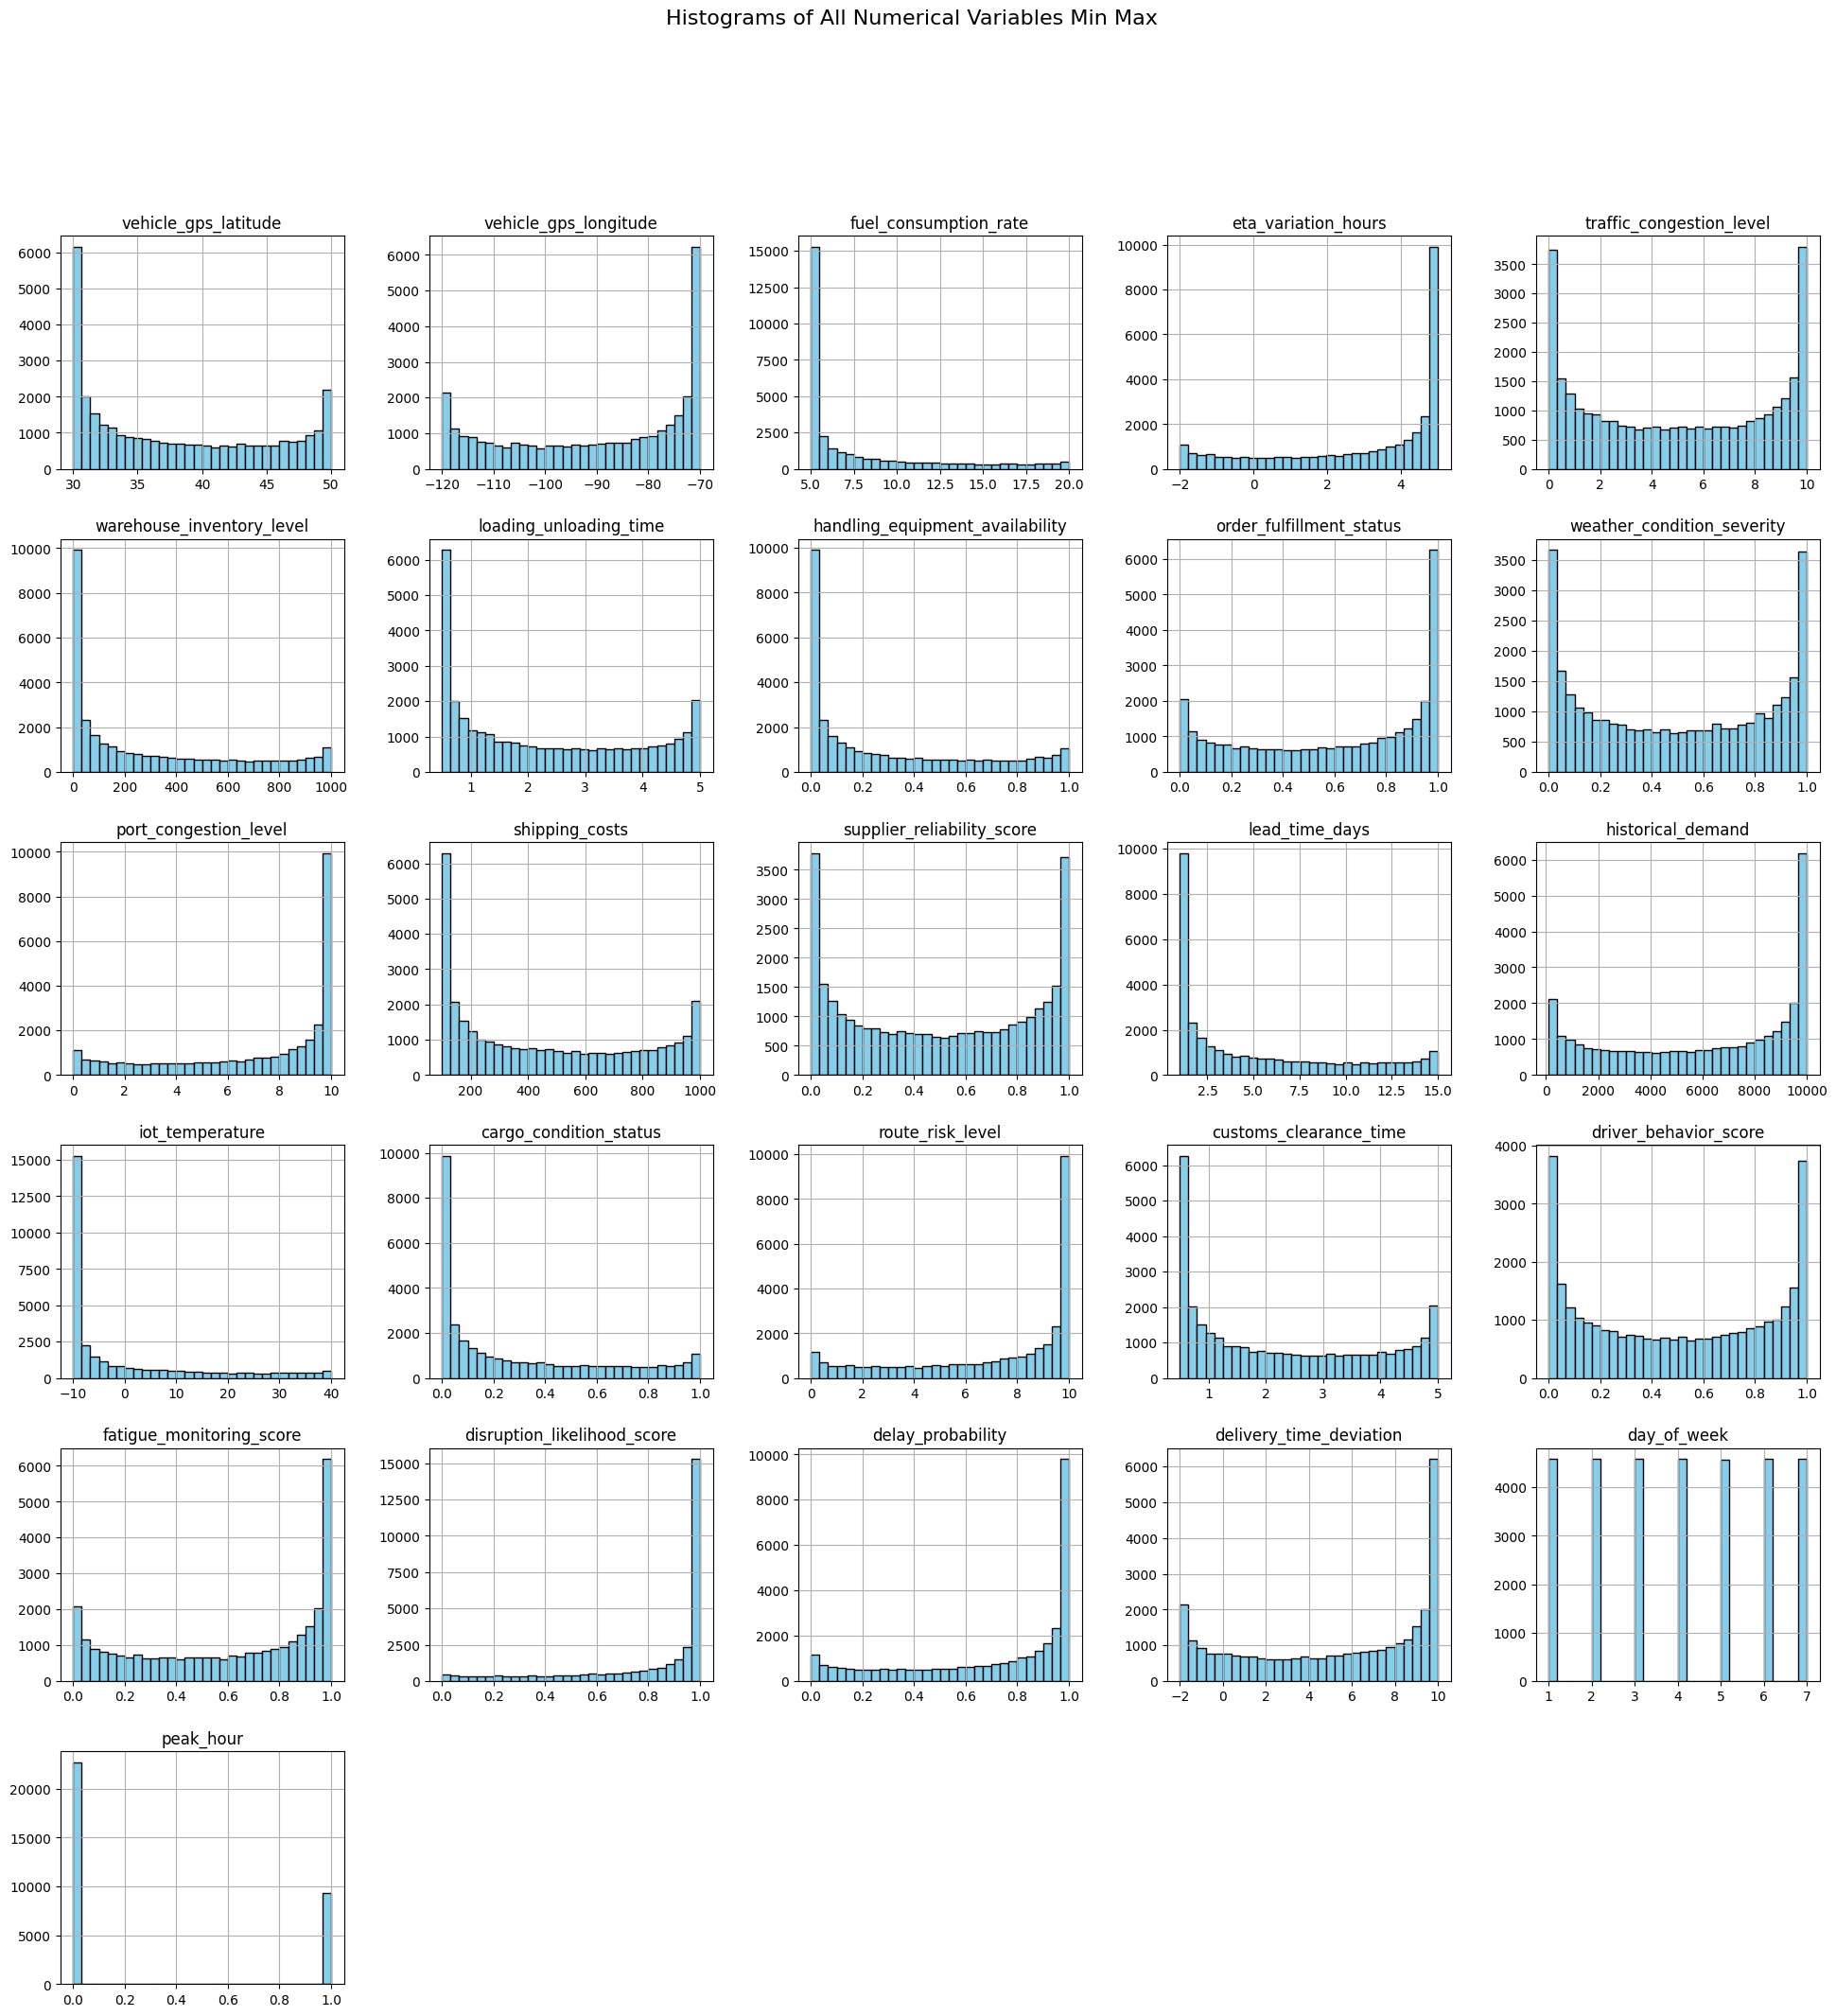

In [10]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(24, 24), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numerical Variables Min Max", fontsize=16)
plt.show()

In real-world logistics data, one would expect bell-shaped or skewed distribution, The Data feels a bit synthesized.

## Encoding Risk Classification

In [11]:

# Map categories to numeric values
risk_map = {
    "High Risk": 2,
    "Moderate Risk": 1,
    "Low Risk": 0
}

df['risk_classification_encoded'] = df['risk_classification'].map(risk_map)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Preliminary Exploratory Data Analysis

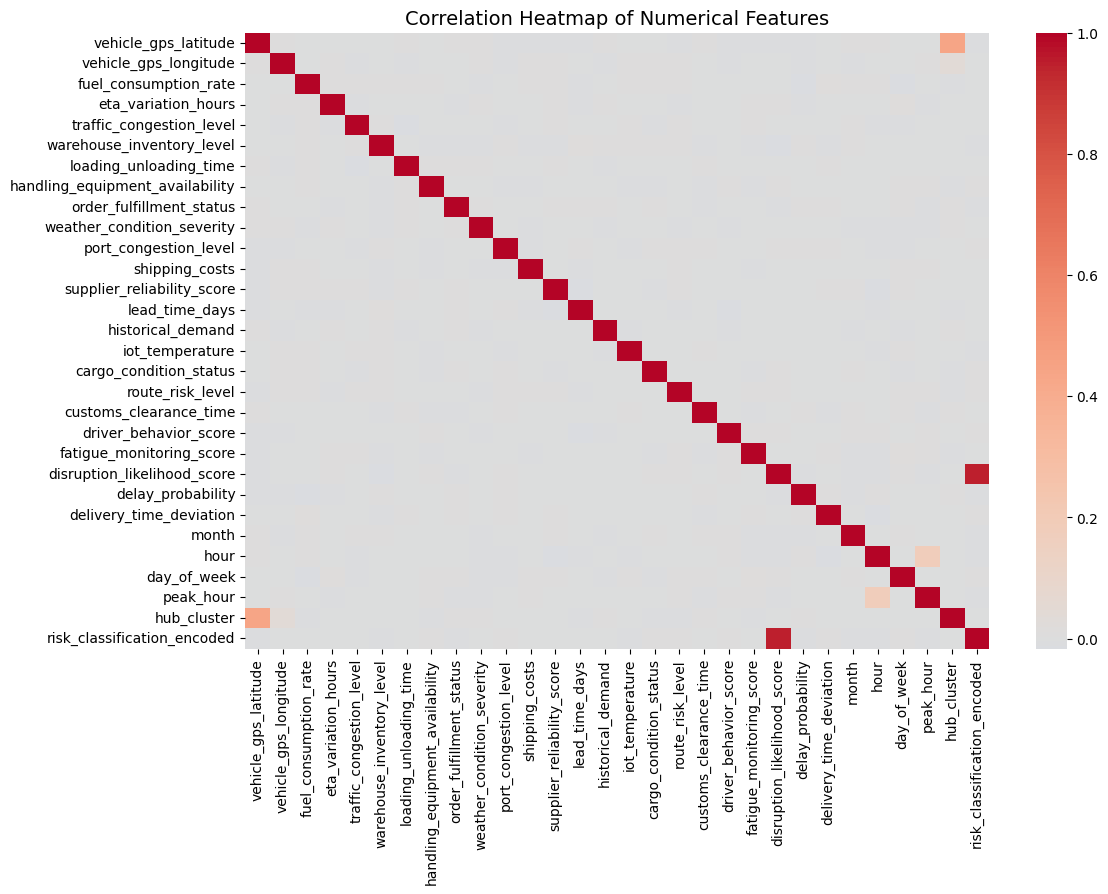

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()





*   Most variables in the dataset show very weak correlations with each other, suggesting they were generated independently rather than from real-world dependencies.
*   Features like fuel, congestion, customs, and costs don’t correlate strongly, which is unrealistic compared to actual logistics data (where congestion ↔ delay, fuel ↔ distance, etc.)



Other Correlation Maps

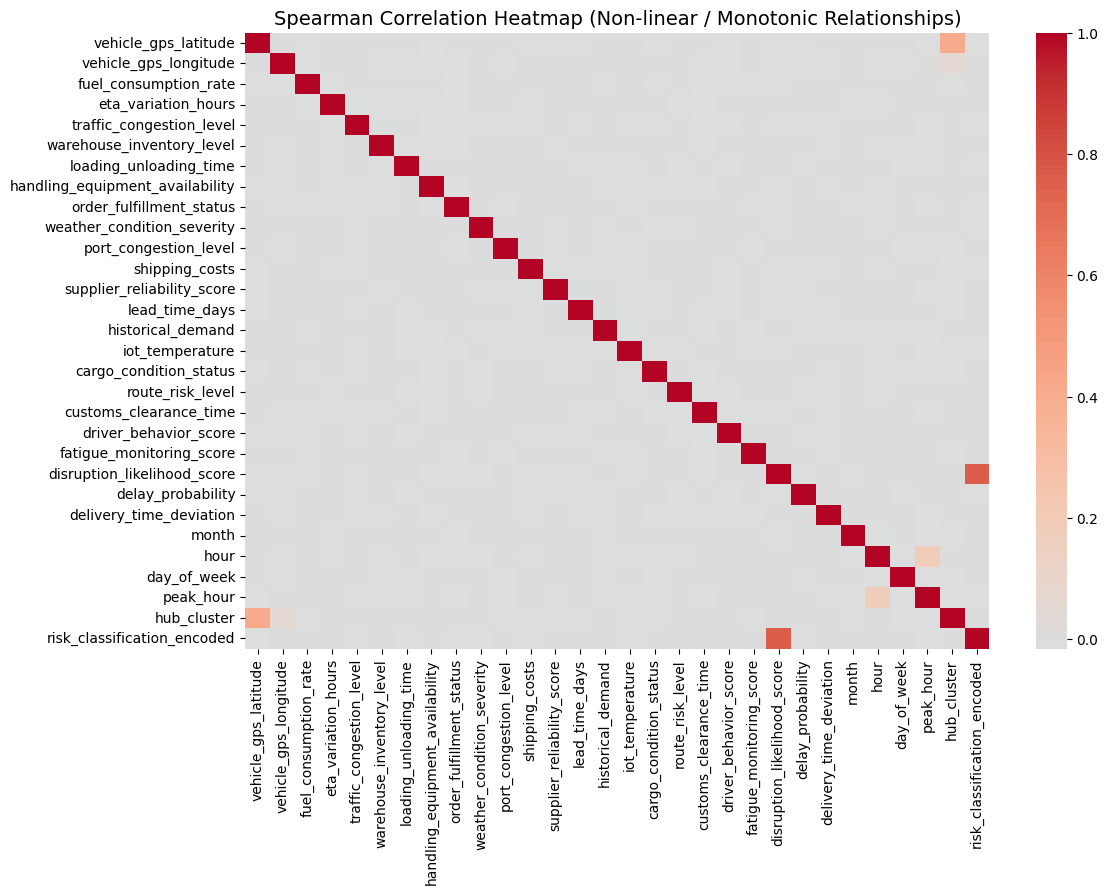

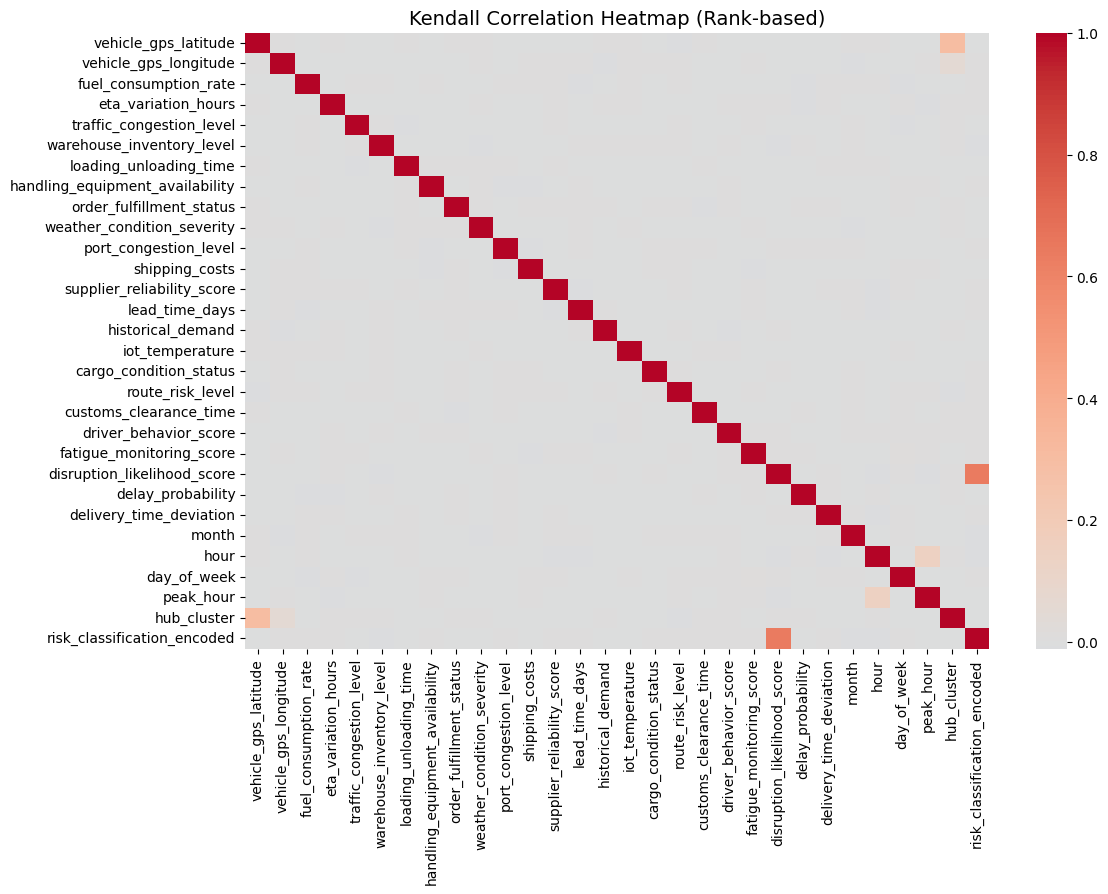

/tmp/ipython-input-3866191913.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="viridis")


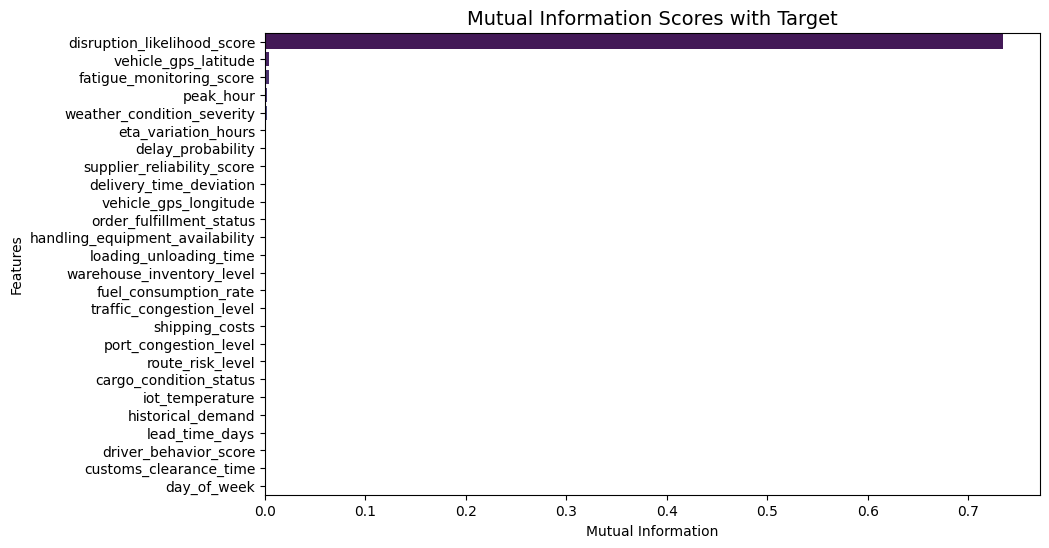

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression



# ---------- Kendall Correlation Heatmap ----------
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True, method="kendall"), cmap="coolwarm", center=0, annot=False)
plt.title("Kendall Correlation Heatmap (Rank-based)", fontsize=14)
plt.show()

# ---------- Mutual Information (MI) with Target Example ----------
# If your target is categorical
target = "risk_classification_encoded"   # change as needed
X = df.drop(columns=[target])
y = df[target]

mi = mutual_info_classif(X.select_dtypes(include=['float64','int64']), y, random_state=42)

mi_scores = pd.Series(mi, index=X.select_dtypes(include=['float64','int64']).columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="viridis")
plt.title("Mutual Information Scores with Target", fontsize=14)
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()


## Feature Engineering

- **fuel_efficiency_index** → Adjusts fuel consumption by penalizing poor driver behavior using a sigmoid scaling.  
- **congestion_stress** → Captures squared road + port congestion impact, normalized by time of day (hour).  
- **logistics_resilience** → Measures stability by exponentially down-weighting ETA variation, delay probability, and disruption risk.  
- **inventory_pressure** → Ratio of demand to available inventory, log-scaled to smooth extreme values.  
- **loading_saturation** → Efficiency ratio of order fulfillment relative to loading/unloading time, bounded between -1 and 1.  
- **clearance_friction** → Magnitude of customs delays compounded by port congestion intensity.  
- **human_performance_risk** → Exponential amplification of risky driver behavior when fatigue is high.  






In [ ]:
import numpy as np

df['fuel_efficiency_index'] = df['fuel_consumption_rate'] / (1 + np.exp(df['driver_behavior_score']))
df['congestion_stress'] = (df['traffic_congestion_level']**2 + df['port_congestion_level']**2) / (1 + df['hour'])
df['logistics_resilience'] = np.exp(-(df['eta_variation_hours']**2 + df['delay_probability'] + df['disruption_likelihood_score']))
df['inventory_pressure'] = np.log1p((df['historical_demand'] + 1) / (df['warehouse_inventory_level'] + 1))
df['loading_saturation'] = np.tanh(df['order_fulfillment_status'] / (df['loading_unloading_time'] + 0.1))
df['clearance_friction'] = np.sqrt(df['customs_clearance_time'] * (1 + df['port_congestion_level']))
df['human_performance_risk'] = df['driver_behavior_score'] * np.exp(1 - df['fatigue_monitoring_score'])

## Reducing Dataset Columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize Engineered Features
cols_to_normalize = [
    'fuel_efficiency_index',
    'congestion_stress',
    'logistics_resilience',
    'inventory_pressure',
    'loading_saturation',
    'clearance_friction',
    'human_performance_risk'
]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Keep only engineered + target features

cols_to_keep = cols_to_normalize + [
    'risk_classification_encoded'
    # ,'shipping_costs',
    # 'delivery_time_deviation','delay_probability','disruption_likelihood_score'
]

df_model = df[cols_to_keep].copy()

In [ ]:

print("Clean modeling dataset shape:", df_model.shape)
print(df_model.head())

Clean modeling dataset shape: (32065, 8)
   fuel_efficiency_index  congestion_stress  logistics_resilience  \
0               0.136404           0.267719          1.874758e-12   
1               0.109766           0.129506          9.407153e-02   
2               0.100165           0.282526          1.288139e-12   
3               0.234349           0.099026          2.844983e-05   
4               0.131091           0.064094          5.474788e-06   

   inventory_pressure  loading_saturation  clearance_friction  \
0            0.000112            0.160619            0.137463   
1            0.281735            0.184925            0.309586   
2            0.106739            0.037954            0.366605   
3            0.799576            0.922223            0.908499   
4            0.121811            0.015486            0.179671   

   human_performance_risk  risk_classification_encoded  
0                0.012723                            1  
1                0.080527              

New Columns: fuel_efficiency_index,congestion_stress,logistics_resilience,inventory_pressure,loading_saturation,clearance_friction,human_performance_risk

Target Column:risk_classification_encoded

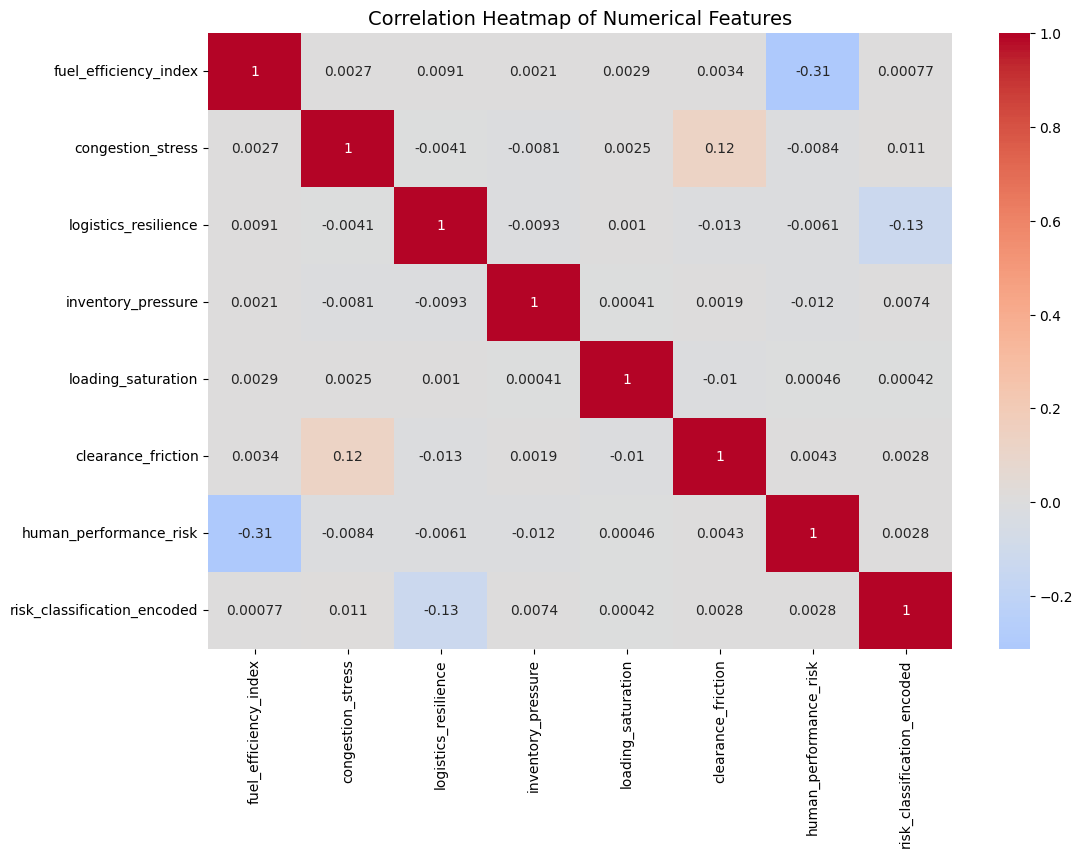

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_model.corr(numeric_only=True), cmap="coolwarm", center=0, annot=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()




*   Human performance risk has a moderate negative correlation (-0.31) with fuel efficiency index, suggesting risky drivers consume more fuel.
*   Logistics resilience shows a weak negative correlation (-0.13) with risk classification, hinting it may capture some vulnerability signal.
*   Clearance friction has a small positive link (0.12) with congestion stress, which aligns with intuition (busy ports → longer clearance times).


Adding this new explanatory power that wasn’t strongly visible in raw variables, especially around human and operational risks.




### Analysing New Data Spread

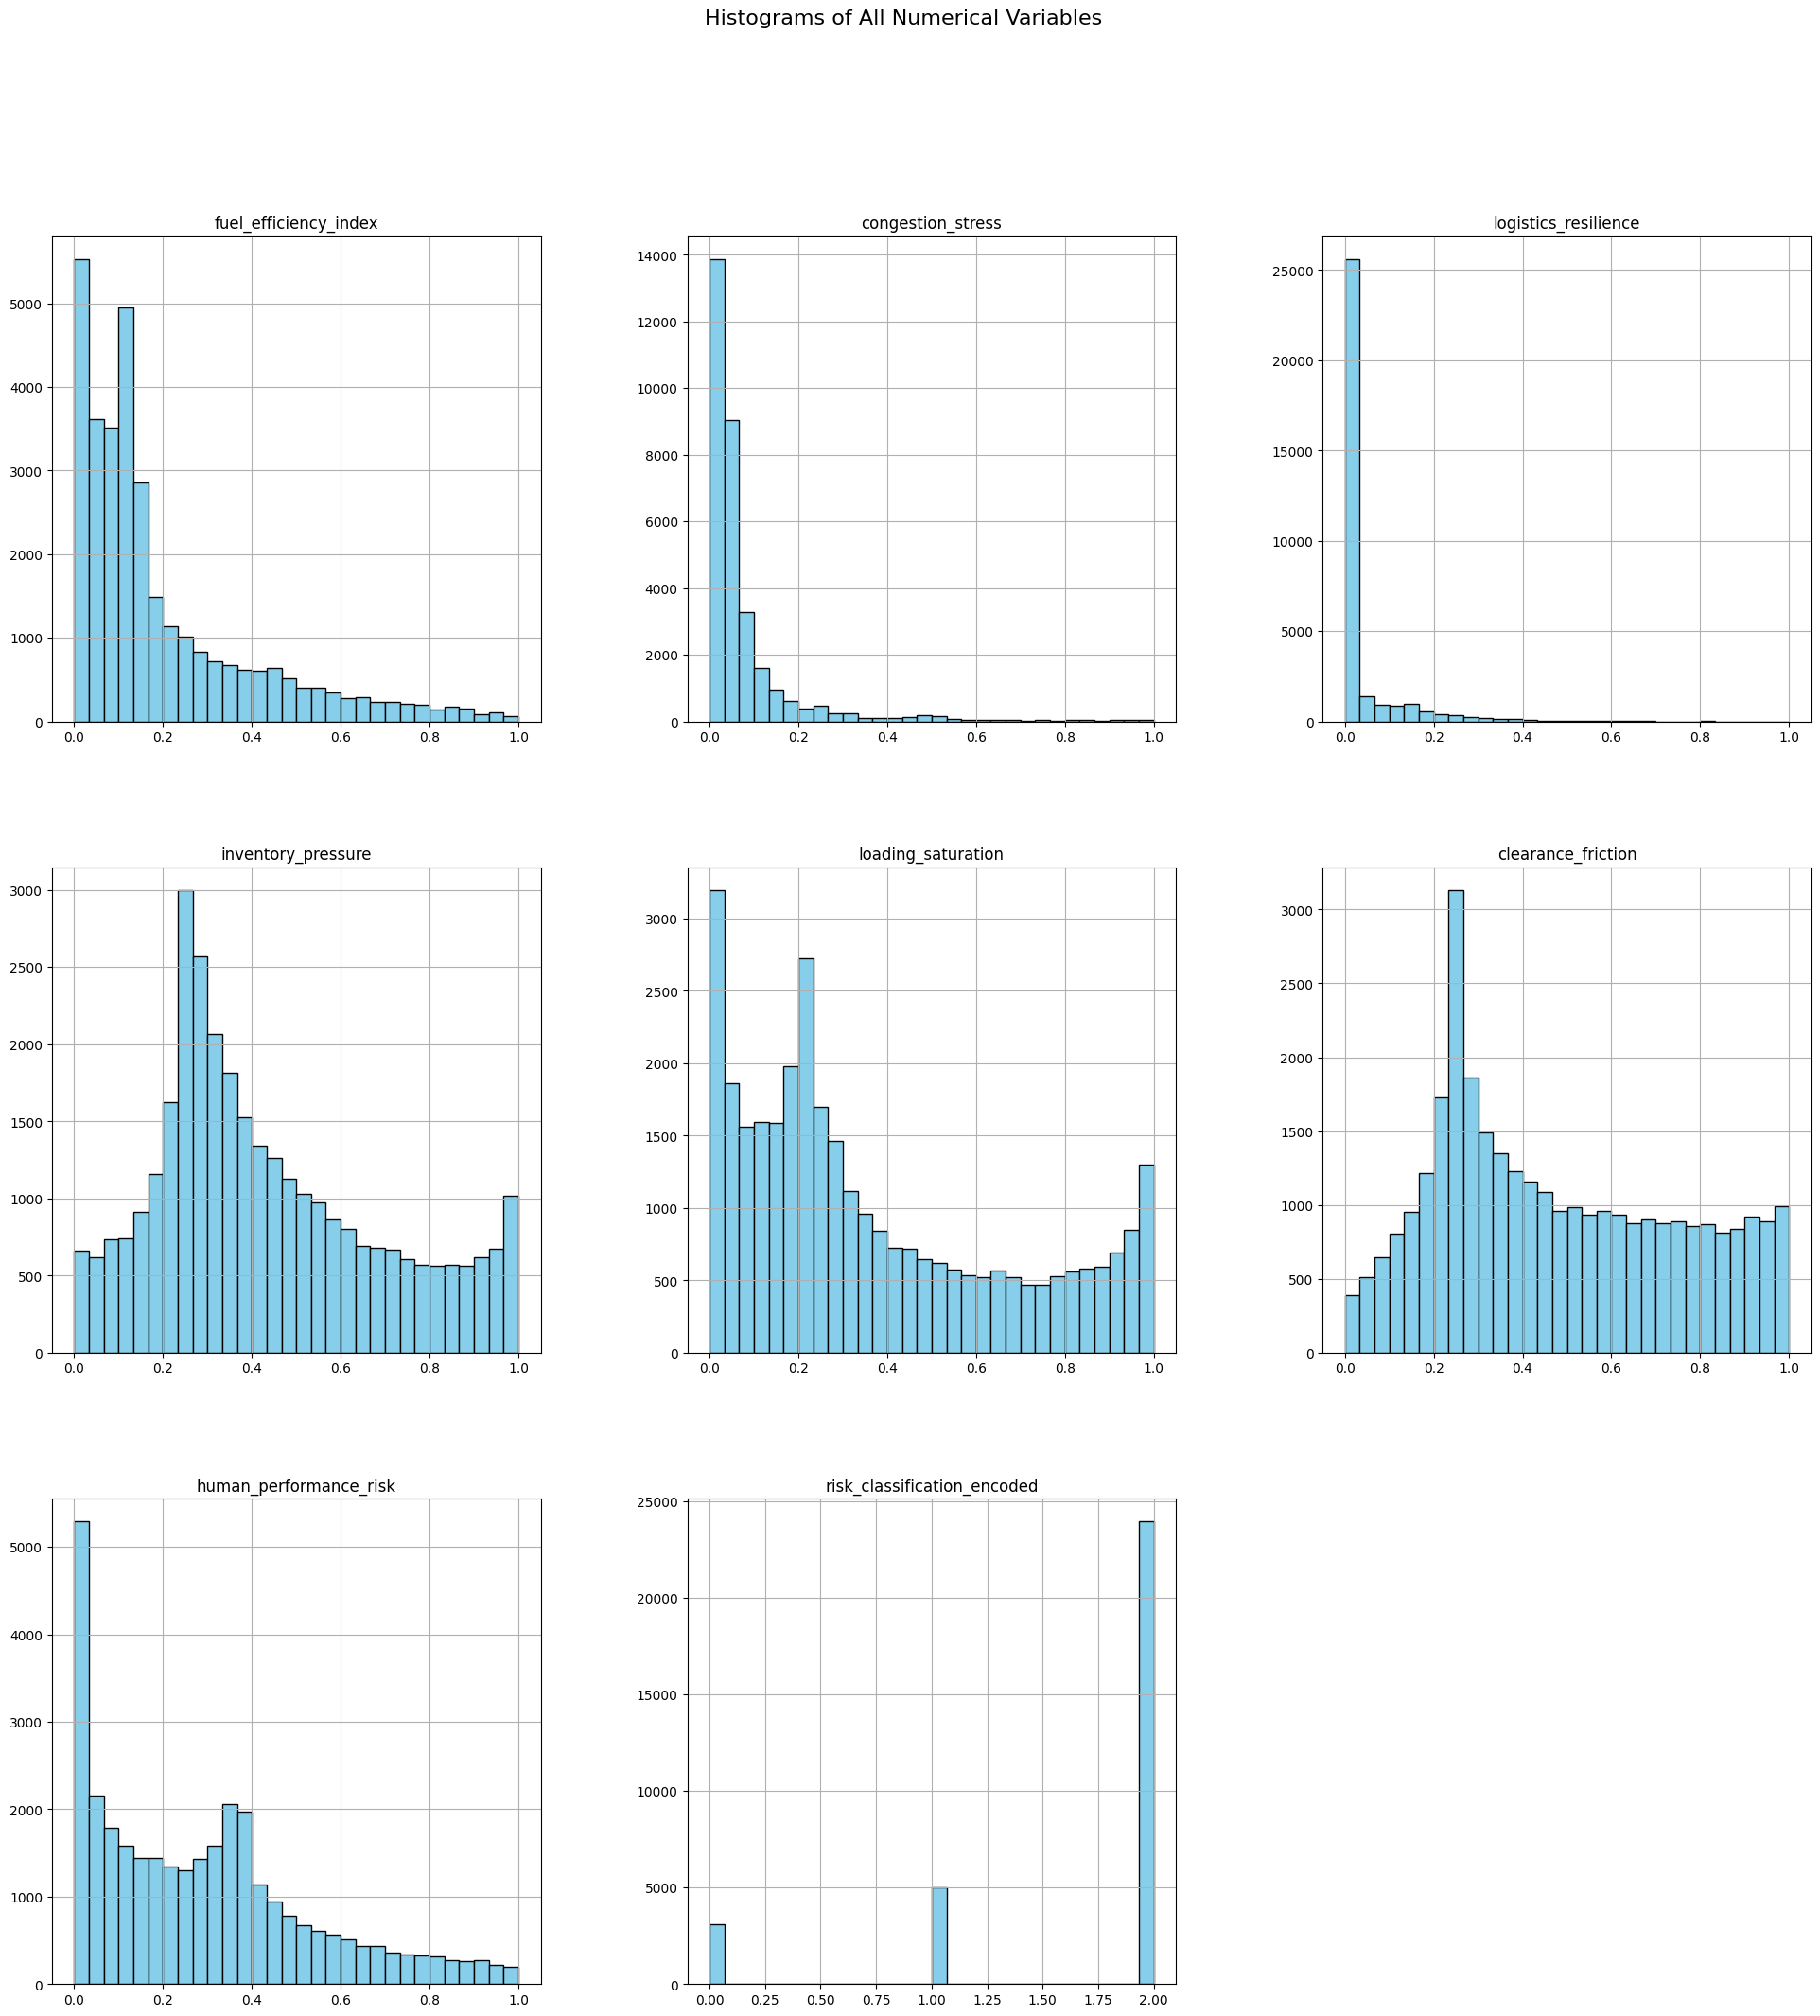

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df_model.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(24, 24), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numerical Variables", fontsize=16)
plt.show()

The Dataset is clearly imabalanced with

2- 23000+ Datapoints
1- 5000 + Datapoints
0 >3000 + Datapoints

Needs To balance to avoid Bias

### Balancing Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features (X) and categorical target (y)
X = df_model.drop(columns=['risk_classification_encoded'])
y = df_model['risk_classification_encoded']

y
print("Before SMOTE:", Counter(y))

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))

# Recombine into new balanced DataFrame
df_smote = X_resampled.copy()
df_smote['risk_classification_encoded'] = y_resampled

print("New shape:", df_smote.shape)

Before SMOTE: Counter({2: 23944, 1: 5011, 0: 3110})
After SMOTE: Counter({1: 23944, 2: 23944, 0: 23944})
New shape: (71832, 8)


/tmp/ipython-input-2938730192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")
/tmp/ipython-input-2938730192.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set2")


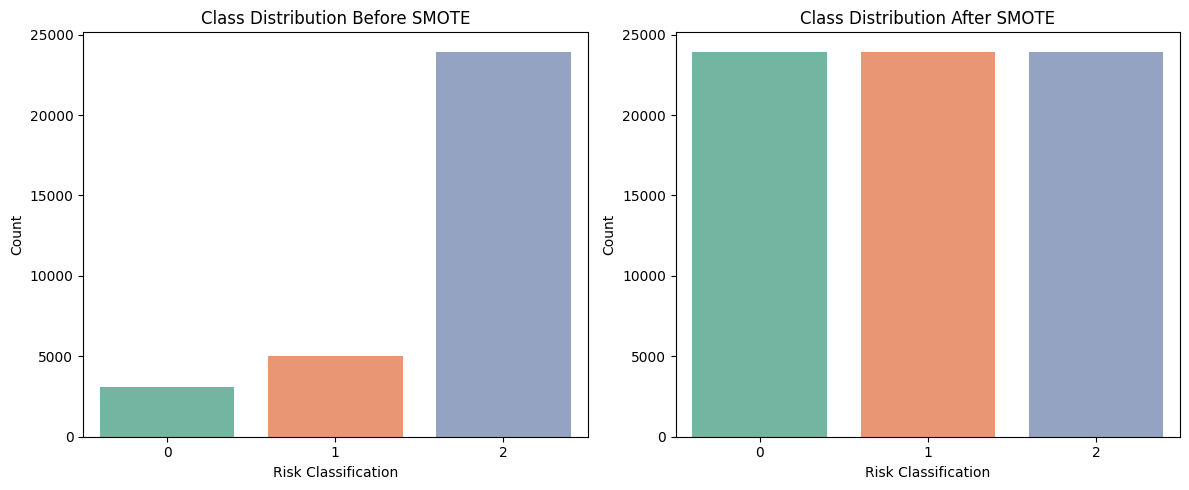

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot before SMOTE
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Risk Classification")
plt.ylabel("Count")

# Plot after SMOTE
plt.subplot(1,2,2)
sns.countplot(x=y_resampled, palette="Set2")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Risk Classification")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


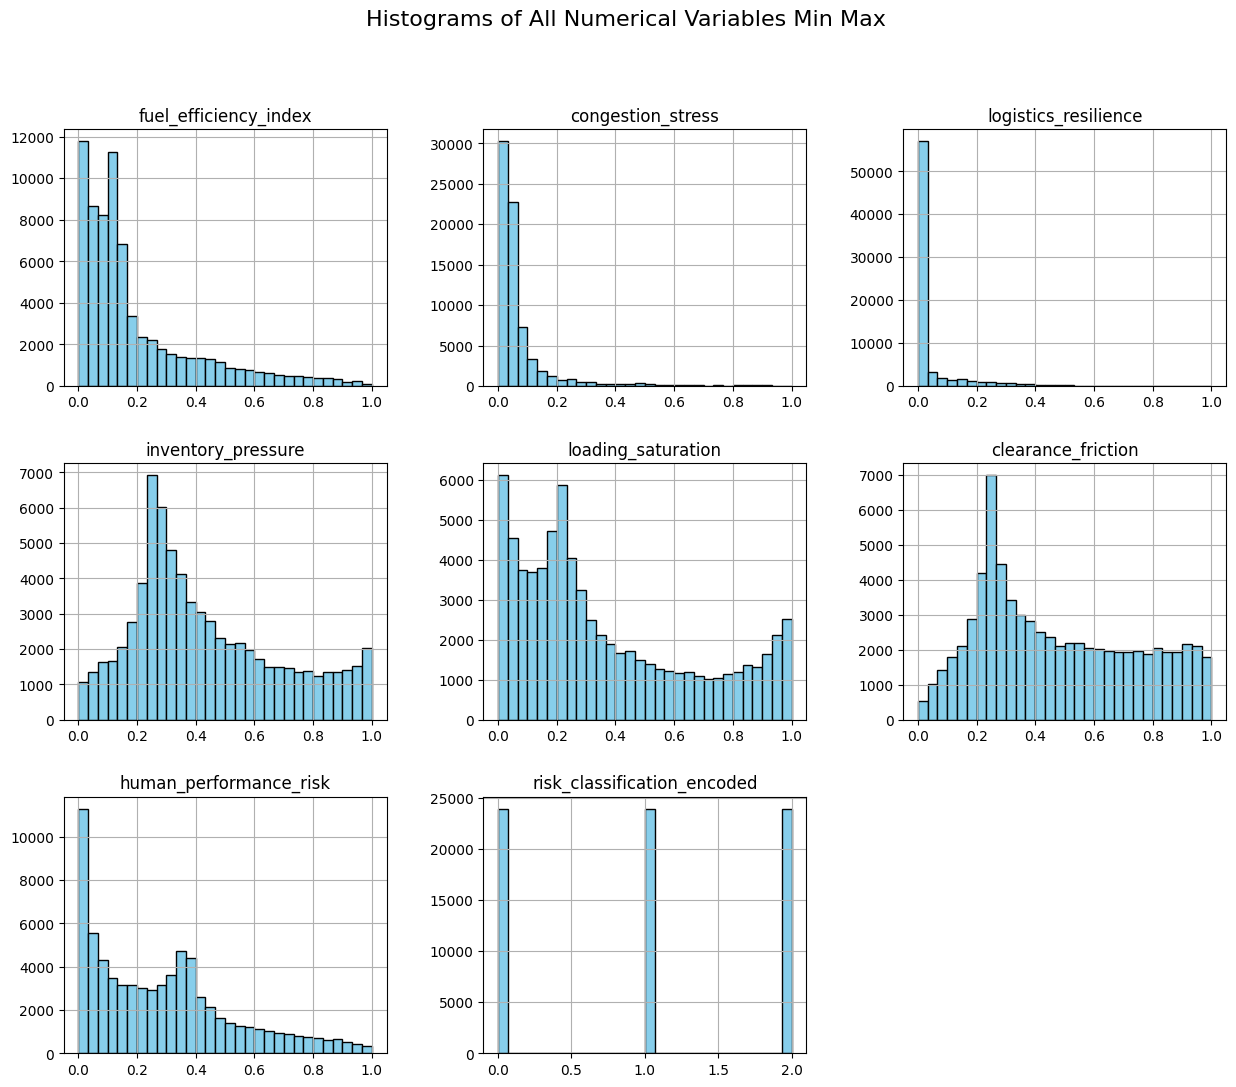

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df_smote.select_dtypes(include=['float64', 'int64']).columns

df_smote[numeric_cols].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numerical Variables Min Max", fontsize=16)
plt.show()

### Saving Dataset

In [ ]:
# Save to CSV
df_smote.to_csv("Datathon_Cleaned.csv", index=False)

print("saved as CSV")


saved as CSV


# Modelling

## XGB Classifier to Identify Risk_Classification

Accuracy: 74.69%

test_size=0.5 (32,000+)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:54:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Results
Accuracy: 0.7469651408842856

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80     11972
           1       0.75      0.76      0.76     11972
           2       0.72      0.64      0.68     11972

    accuracy                           0.75     35916
   macro avg       0.75      0.75      0.74     35916
weighted avg       0.75      0.75      0.74     35916



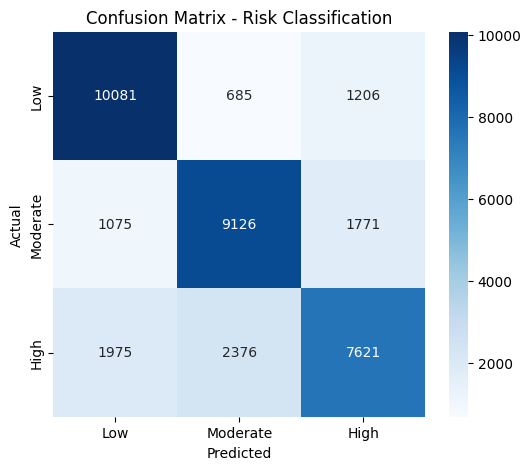

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    r2_score, mean_squared_error
)
import seaborn as sns
import matplotlib.pyplot as plt

# SELECT ONLY ENGINEERED FEATURES
engineered_features = [
    'fuel_efficiency_index',
    'congestion_stress',
    'logistics_resilience',
    'inventory_pressure',
    'loading_saturation',
    'clearance_friction',
    'human_performance_risk'
]

# Classification target
X_class = df_smote[engineered_features]
y_class = df_smote['risk_classification_encoded']


# CLASSIFICATION: Risk Classification

X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.5, random_state=42, stratify=y_class
)

xgb_clf = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=12,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("\nClassification Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.title("Confusion Matrix - Risk Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


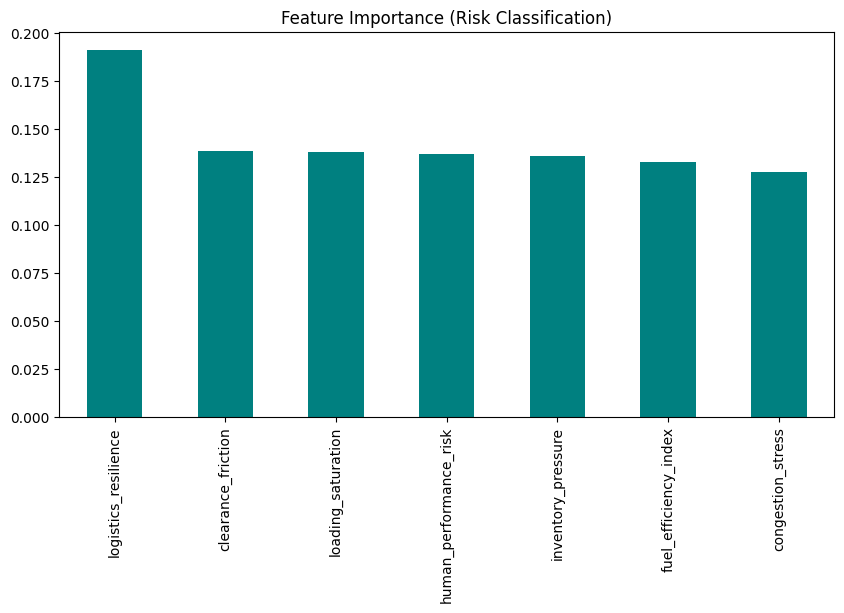

In [ ]:

# Feature Importance
importances = pd.Series(xgb_clf.feature_importances_, index=engineered_features).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(10,5), color="teal", title="Feature Importance (Risk Classification)")
plt.show()


The feature importance plot shows that logistics_resilience is the strongest predictor of risk classification, followed by clearance_friction and loading_saturation. Overall, all engineered features contribute fairly evenly, but resilience-related and clearance-related factors drive risk outcomes the most.

## Tab Transformer to Identify Risk_Classification

Validation Accuracy : 83.9%

Test Accuracy: 57.8%

In [ ]:
# !pip install pytorch-widedeep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.1 MB/s

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabTransformer, WideDeep
from pytorch_widedeep.training import Trainer
from pytorch_widedeep.metrics import Accuracy, F1Score

# Load Data

df = pd.read_csv("Datathon_Cleaned.csv")

# Keep only engineered features + target
selected_features = [
    'fuel_efficiency_index',
    'congestion_stress',
    'logistics_resilience',
    'inventory_pressure',
    'loading_saturation',
    'clearance_friction',
    'human_performance_risk'
]

X = df[selected_features]
y = df["risk_classification_encoded"]

print("Shape of X:", X.shape)
print("Unique target classes:", np.unique(y))


# Preprocess

preprocessor = TabPreprocessor(
    continuous_cols=selected_features,
    cols_to_scale=selected_features  # ensure scaling
)

X_tab = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tab, y, test_size=0.2, random_state=42, stratify=y
)


# TabTransformer (continuous only)

tab_transformer = TabTransformer(
    column_idx=preprocessor.column_idx,
    continuous_cols=selected_features,
    embed_continuous=True,
    embed_continuous_method="standard",  # normalize embeddings
    n_heads=8,
    n_blocks=4,
    mlp_hidden_dims=[512],
    mlp_dropout=0.1,
    attn_dropout=0.2,
    ff_dropout=0.2
)


# Wrap with WideDeep with correct output dimension

n_classes = len(np.unique(y))
model = WideDeep(
    deeptabular=tab_transformer,
    pred_dim=n_classes
)


# Trainer with proper metric objects

trainer = Trainer(
    model=model,
    objective="multiclass",
    metrics=[Accuracy(), F1Score(average="macro")],
    verbose=1,
    patience=3
)


# Train

trainer.fit(
    X_tab=X_train,
    target=y_train.values,
    n_epochs=100,   # you can increase if stable
    batch_size=64,
    validation_split=0.2
)


Shape of X: (71832, 7)
Unique target classes: [0 1 2]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
  0%|          | 0/898 [00:00<?, ?it/s]/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=35803) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
epoch 1: 100%|██████████| 898/898 [00:17<00:00, 52.67it/s, loss=0.893, metrics={'acc': 0.5198, 'f1': 0.51}]
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7daf5a235710>
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7daf5a235710>
  self.pid = os.fork()
epoch 2: 100%|██████████| 898/898 [00:1

In [ ]:
# 7. Evaluate
preds = trainer.predict(X_tab=X_test)

# If preds is 1D, expand it to 2D
if preds.ndim == 1:
    # Binary-like output, convert to class labels
    pred_classes = (preds > 0.5).astype(int)
else:
    # Multiclass output
    pred_classes = np.argmax(preds, axis=1)

acc = (pred_classes == y_test.values).mean()
print("Test Accuracy:", acc)


predict: 100%|██████████| 225/225 [00:01<00:00, 138.36it/s]
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7daf5a235710>
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7daf5a235710>
  self.pid = os.fork()


Test Accuracy: 0.578200041762372


## Why Feature Engineering is Important?

Training the XGB model with Raw features

Before SMOTE: Counter({2: 23944, 1: 5011, 0: 3110})
After SMOTE: Counter({1: 23944, 2: 23944, 0: 23944})


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:05:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Results
Accuracy: 0.9986357055351376

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11972
           1       1.00      1.00      1.00     11972
           2       1.00      1.00      1.00     11972

    accuracy                           1.00     35916
   macro avg       1.00      1.00      1.00     35916
weighted avg       1.00      1.00      1.00     35916



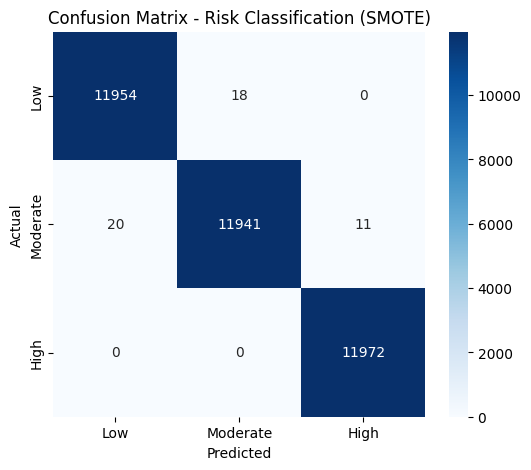

In [ ]:

# PREP DATA (No engineered features + SMOTE)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
PATH = "/content/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(PATH)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name().map({
    "Sunday": 1, "Monday": 2, "Tuesday": 3,
    "Wednesday": 4, "Thursday": 5, "Friday": 6, "Saturday": 7
})
df['peak_hour'] = df['hour'].apply(lambda h: 1 if (7 <= h <= 9 or 16 <= h <= 19) else 0)

# Encode target
risk_map = {"High Risk": 2, "Moderate Risk": 1, "Low Risk": 0}
df['risk_classification_encoded'] = df['risk_classification'].map(risk_map)

# Drop unwanted columns (timestamp + GPS + original risk text + disruption score)
df_clean = df.drop(
    columns=['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
             'risk_classification'],
    errors='ignore'
)


# CLASSIFICATION (with SMOTE)

X_class = df_clean.drop(columns=['risk_classification_encoded'])
y_class = df_clean['risk_classification_encoded']

print("Before SMOTE:", Counter(y_class))

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_class, y_class)

print("After SMOTE:", Counter(y_resampled))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.5, random_state=42, stratify=y_resampled
)

# Train XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)

print("\nClassification Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.title("Confusion Matrix - Risk Classification (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


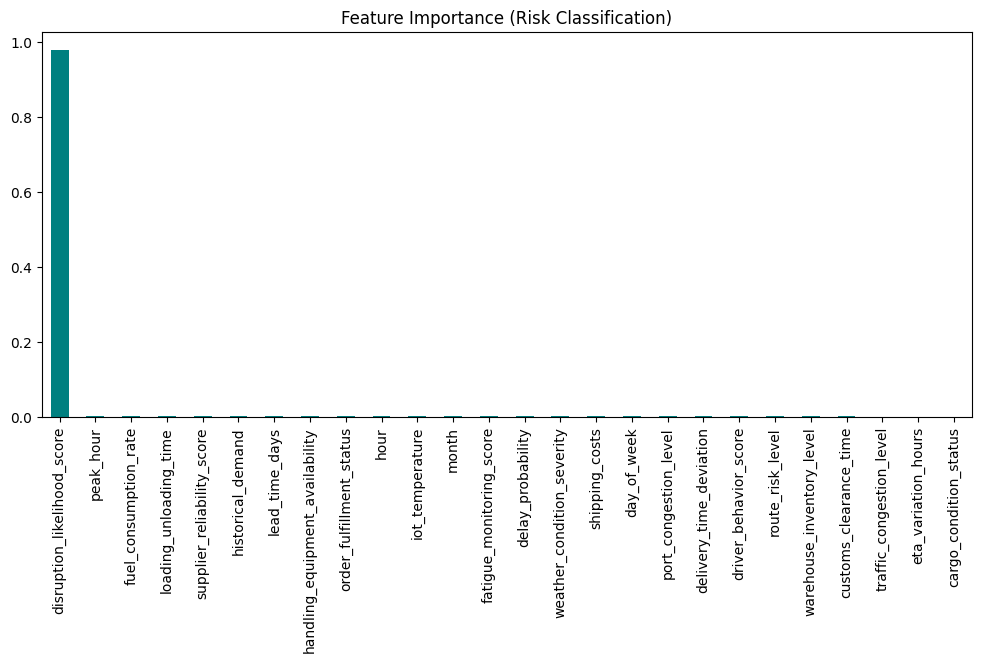

In [ ]:

# Feature Importance
importances = pd.Series(xgb_clf.feature_importances_, index=X_class.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12,5), color="teal", title="Feature Importance (Risk Classification)")
plt.show()


#### Explanation


The raw model shows that a single variable (disruption_likelihood_score) dominates prediction, meaning the model learns almost nothing from the other features.

This leads to a “shortcut learning” problem, where the classifier relies on one proxy feature instead of understanding broader logistics dynamics.

After feature engineering, importance is spread across multiple engineered features (e.g., logistics_resilience, clearance_friction), making the model more robust and interpretable.

This balance ensures that risk classification is influenced by human factors, operational stress, and system resilience, not just a single synthetic score.

# Conclusion



1. **Enhanced Risk Detection**  
   - Features like `logistics_resilience` and `human_performance_risk` reveal hidden vulnerabilities.  
   - They allow early warnings for disruptions before they escalate.  

2. **Operational Decision-Making**  
   - `congestion_stress` and `clearance_friction` highlight where bottlenecks occur.  
   - Managers can re-route shipments, adjust schedules, or pre-clear customs to reduce delays.  

3. **Resource Optimization**  
   - `inventory_pressure` balances stock across warehouses by linking demand and inventory.  
   - Prevents costly stockouts or overstock, reducing both risk and operating costs.  

4. **Human Factor Management**  
   - `human_performance_risk` connects driver behavior and fatigue with potential delays or safety risks.  
   - Businesses can implement better shift rotations, training, or incentive programs.  

5. **Strategic Business Impact**  
   - Engineered features enable “what-if” scenario simulations (e.g., port strike, extreme congestion).  
   - This turns raw data into **actionable intelligence**, supporting smarter investment and resource allocation.  

---

